In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Загрузка таблицы

In [52]:
df = pd.read_excel("Реклама_в_поиске_по_запросу_футболка_белая_женская.xlsx", header=7)

print(df.head())
print(df.columns)

     Артикул Дата создания  Выручка  Заказы  Средняя цена без СПП  \
0  321555743    2025-02-01  6249720    6651                956.77   
1   35477396    2021-07-29  3160006    2645               1186.57   
2   96318847    2022-09-29  8069644    6354               1280.77   
3  159089242    2023-05-24  7607974    6278               1219.00   
4   33562590    2021-07-06  2899442    2380               1209.53   

   Средний чек  Коэффициент демпинга  Остатки на конец периода  \
0       939.67                  1.79                     10708   
1      1194.71                  0.00                      2493   
2      1270.01                  0.84                      6277   
3      1211.85                  0.59                     10738   
4      1218.25                  0.00                      3504   

   Дней в наличии  Дней отсутствовал  ...  Рейтинг  \
0              30                  0  ...      4.7   
1              30                  0  ...      4.9   
2              30         

Убираем лишние признаки

In [53]:
df = df.drop(['Дата создания', 'Выручка', 'Выручка в день при наличии товаров', 'Упущенная выручка', 'Название', 'Поставщик', 'Бренд', 'Предмет', 'Позиция в выдаче', 'Стоимость за 1000 показов', 'Тип рекламы', 'Буст на позицию'], axis=1)

print(df.head())

     Артикул  Заказы  Средняя цена без СПП  Средний чек  Коэффициент демпинга  \
0  321555743    6651                956.77       939.67                  1.79   
1   35477396    2645               1186.57      1194.71                  0.00   
2   96318847    6354               1280.77      1270.01                  0.84   
3  159089242    6278               1219.00      1211.85                  0.59   
4   33562590    2380               1209.53      1218.25                  0.00   

   Остатки на конец периода  Дней в наличии  Дней отсутствовал  \
0                     10708              30                  0   
1                      2493              30                  0   
2                      6277              30                  0   
3                     10738              30                  0   
4                      3504              30                  0   

   Доля дней в наличии  Среднее кол-во заказов при наличии  \
0                100.0                          221.70

Проверка на пропуски

In [54]:
print(df.isnull().sum())
df = df.dropna()

Артикул                                0
Заказы                                 0
Средняя цена без СПП                   0
Средний чек                            0
Коэффициент демпинга                   0
Остатки на конец периода               0
Дней в наличии                         0
Дней отсутствовал                      0
Доля дней в наличии                    0
Среднее кол-во заказов при наличии     0
Общая скидка без СПП                   0
Упущенные заказы                       0
Рейтинг                                0
Количество отзывов на конец периода    0
Буст с позиции                         0
dtype: int64


Проверка на дубликаты

In [55]:
print(df.duplicated().sum())
df = df.drop_duplicates()

0


Проверка на коллинеарность

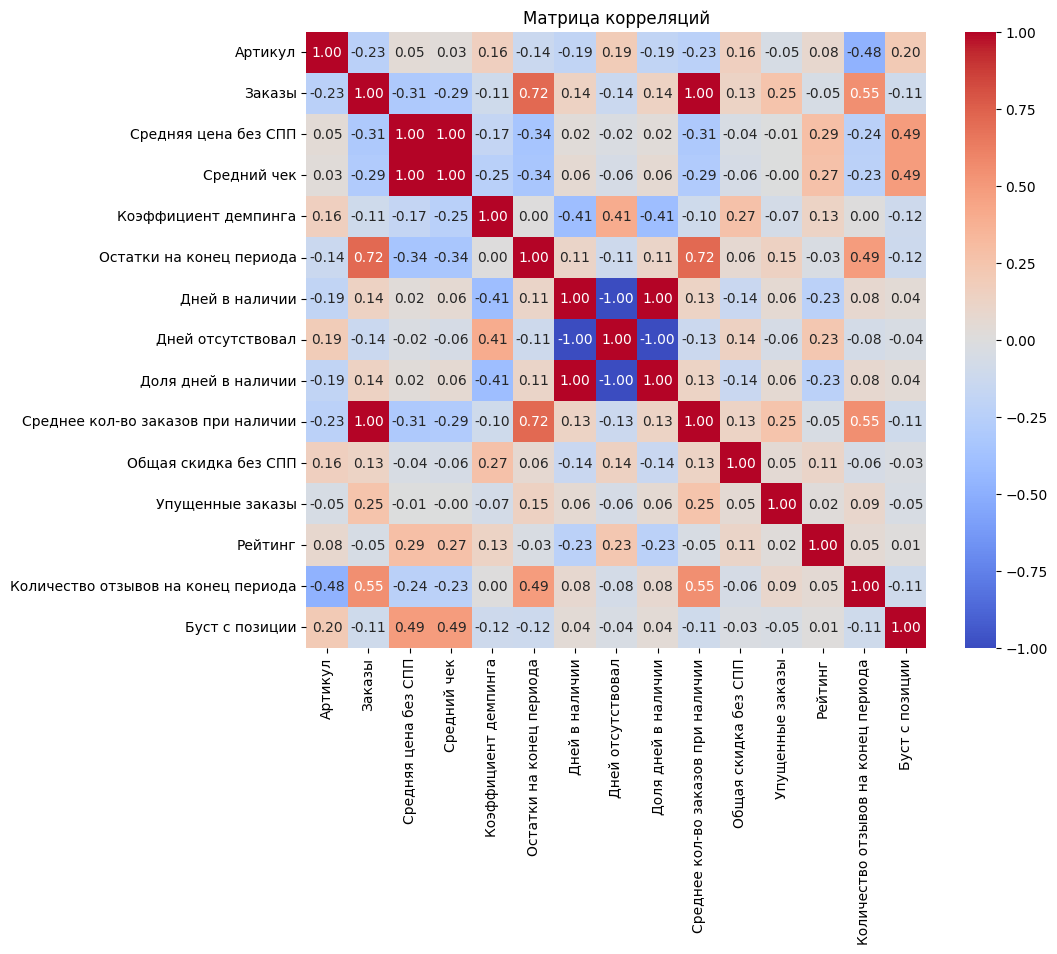

Коллинеарные признаки: Средний чек и Средняя цена без СПП
Коллинеарные признаки: Дней отсутствовал и Дней в наличии
Коллинеарные признаки: Доля дней в наличии и Дней в наличии
Коллинеарные признаки: Среднее кол-во заказов при наличии и Заказы
     Артикул  Заказы  Средняя цена без СПП  Коэффициент демпинга  \
0  321555743    6651                956.77                  1.79   
1   35477396    2645               1186.57                  0.00   
2   96318847    6354               1280.77                  0.84   
3  159089242    6278               1219.00                  0.59   
4   33562590    2380               1209.53                  0.00   

   Остатки на конец периода  Дней в наличии  Общая скидка без СПП  \
0                     10708              30                 70.80   
1                      2493              30                 19.20   
2                      6277              30                 77.87   
3                     10738              30                 23.37   
4  

In [56]:
# Построение матрицы корреляций
corr_matrix = df.corr()
#print(corr_matrix)

# Визуализация тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Матрица корреляций')
plt.show()

# Выбор неколлинеарных факторов (|corr| <= 0.9)
selected_features = []
threshold = 0.9
for col in corr_matrix.columns:
    high_corr = False
    for other_col in selected_features:
        if col != other_col and abs(corr_matrix.loc[col, other_col]) > threshold:
            print("Коллинеарные признаки:", col, "и", other_col)
            high_corr = True
            break
    if not high_corr:
        selected_features.append(col)

df = df[selected_features]
print(df.head())

Предобработка данных целиком

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def data_preprocessing(filename : str):
    # загрузка таблицы
    df = pd.read_excel(filename, header=7)

    # удаление лишних признаков
    df = df.drop(['Дата создания', 'Выручка', 'Выручка в день при наличии товаров', 'Упущенная выручка', 'Название', 'Поставщик', 'Бренд', 'Предмет', 'Позиция в выдаче', 'Стоимость за 1000 показов', 'Тип рекламы', 'Буст на позицию'], axis=1)

    # удаление пустых полей
    df = df.dropna()

    # удаление дубликатов
    df = df.drop_duplicates()

    # удаление коррелирующих призкаков
    corr_matrix = df.corr()
    selected_features = []
    threshold = 0.9
    for col in corr_matrix.columns:
        high_corr = False
        for other_col in selected_features:
            if col != other_col and abs(corr_matrix.loc[col, other_col]) > threshold:
                high_corr = True
                break
        if not high_corr:
            selected_features.append(col)
    df = df[selected_features]

    return df

preprocessed_df = data_preprocessing("Реклама_в_поиске_по_запросу_футболка_белая_женская.xlsx")
print(preprocessed_df.head())


     Артикул  Заказы  Средняя цена без СПП  Коэффициент демпинга  \
0  321555743    6651                956.77                  1.79   
1   35477396    2645               1186.57                  0.00   
2   96318847    6354               1280.77                  0.84   
3  159089242    6278               1219.00                  0.59   
4   33562590    2380               1209.53                  0.00   

   Остатки на конец периода  Дней в наличии  Общая скидка без СПП  \
0                     10708              30                 70.80   
1                      2493              30                 19.20   
2                      6277              30                 77.87   
3                     10738              30                 23.37   
4                      3504              30                 17.40   

   Упущенные заказы  Рейтинг  Количество отзывов на конец периода  \
0                 0      4.7                                 1305   
1               212      4.9          